In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel('/content/Data_Train.xlsx')
test_data = pd.read_excel('/content/Test_set.xlsx')

In [3]:
train_data.shape , test_data.shape

((10683, 11), (2671, 10))

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
train_data.drop_duplicates(keep='first',inplace=True)

In [9]:
train_data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [10]:
train_data['Additional_Info']=train_data['Additional_Info'].replace({'No Info':'No info'})

In [11]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [12]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [13]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [14]:
# # Duration convert hours in min.
# train_data['Duration'] = train_data['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [15]:
# Date_of_Journey
train_data['Day_of_Journey'] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)

In [16]:
train_data['Month_of_Journey'] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
#Dep_Time
train_data['Departure_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Departure_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
# Arrival_Time
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [20]:
%load_ext google.colab.data_table

In [21]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


Text(0, 0.5, 'Count of flights')

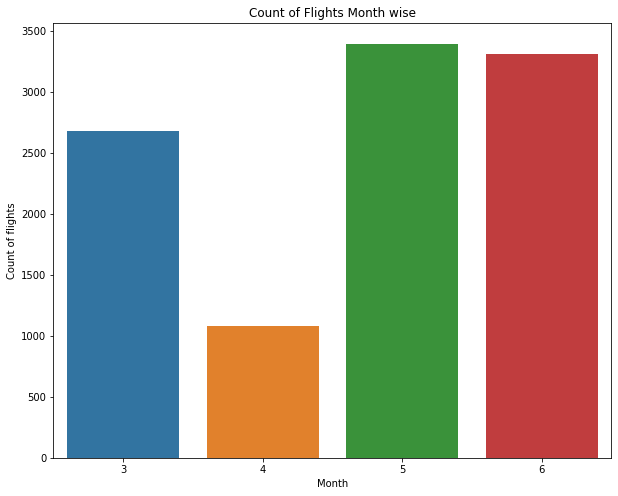

In [22]:
plt.figure(figsize=(10,8))
plt.title('Count of Flights Month wise')
sns.countplot(x='Month_of_Journey',data=train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')

In [23]:
# Total stops
train_data['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4],inplace=True)
test_data['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4],inplace=True)

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0, 0.5, 'Count ')

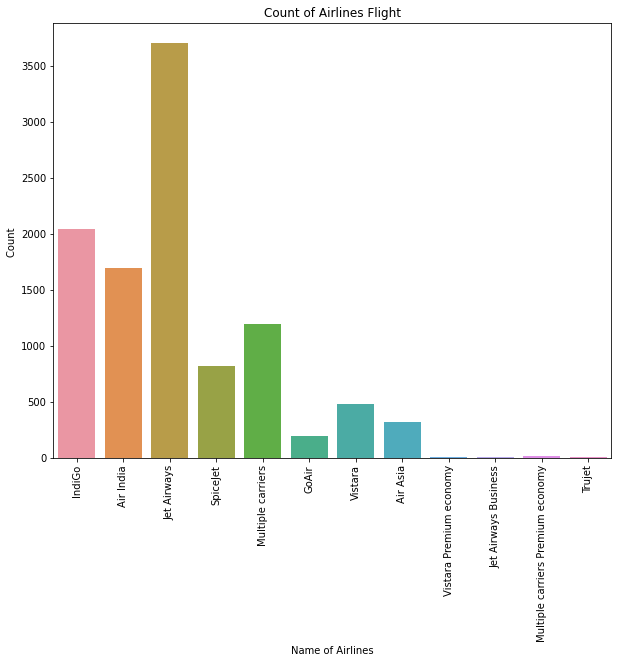

In [25]:
plt.figure(figsize=(10,8))
plt.title('Count of Airlines Flight')
sns.countplot(x='Airline',data=train_data)
plt.xlabel('Name of Airlines')
plt.xticks(rotation=90)
plt.ylabel('Count ')

Text(0, 0.5, 'Price of Ticket')

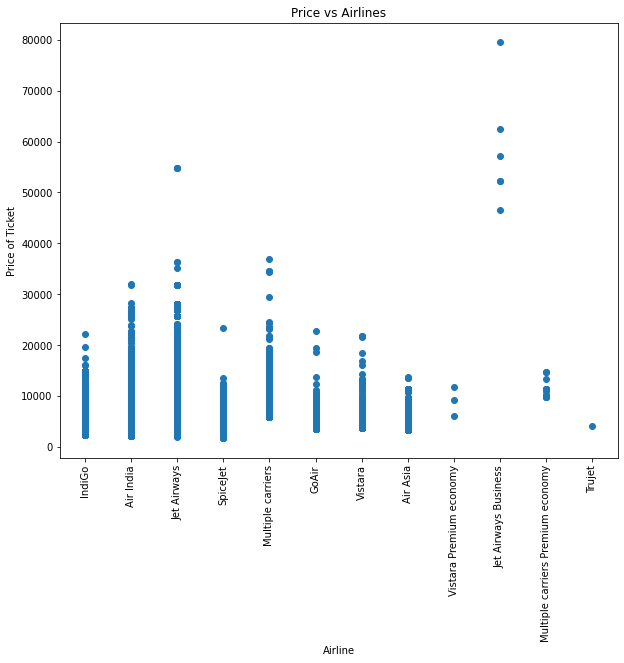

In [26]:
plt.figure(figsize=(10,8))
plt.title('Price vs Airlines')
plt.scatter(train_data['Airline'],train_data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Price of Ticket')


In [27]:
train_data['Airline'].replace({'Multiple carriers Premium economy':'Other' ,'Jet  Airways Business':'Other' ,
                               'Vistara Premium economy':'Other' ,'Truejet':'Other'},inplace =True)

In [28]:
test_data['Airline'].replace({'Multiple carriers Premium economy' : 'Other','Jet Airways Business':'Other','Vistara Premium economy' :'Other', 'Truejet':'Other'},inplace =True)

Text(0, 0.5, 'Price')

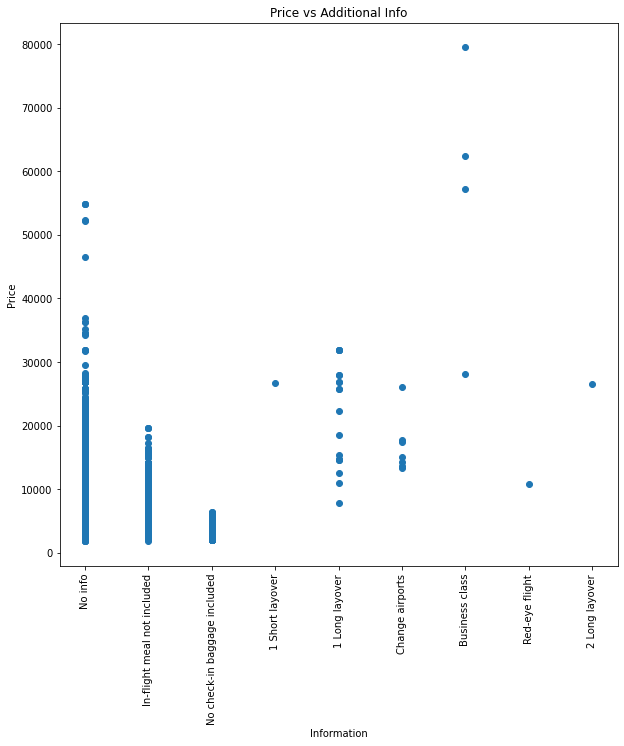

In [29]:
plt.figure(figsize=(10,10))
plt.title('Price vs Additional Info')
plt.scatter(train_data['Additional_Info'],train_data['Price'])
plt.xlabel('Information')
plt.xticks(rotation=90)
plt.ylabel('Price')

In [30]:
train_data['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
#Additional Info
train_data['Additional_Info'].replace({'Change airports':'Other','Business class':'Other','Red-eye flight':'Other',
                                       '1 Short layover':'Other','2 Long layover':'Ohter'},inplace=True)

In [32]:
test_data['Additional_Info'].replace({'Change airports':'Other','Business class':'Other','Red-eye flight':'Other',
                                       '1 Short layover':'Other','2 Long layover':'Ohter'},inplace=True)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,4,45,1,3,16,50,21,35


In [34]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Trujet,Airline_Vistara
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [35]:
train_data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [40]:
data_train.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [42]:
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
data_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [44]:
data_train.head(2)

,Total_Stops,Price,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [46]:

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [47]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [48]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Airline
---------------------------------------------------------------------------
Jet Airways          897
IndiGo               511
Air India            440
Multiple carriers    347
SpiceJet             208
Vistara              129
Air Asia              86
GoAir                 46
Other                  7
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of test data :  (2671, 26)


In [49]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Other,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
data_train.columns

Index(['Total_Stops', 'Price', 'Duration_hours', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Departure_hour', 'Departure_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_Other', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [51]:
X=data_train.loc[:,['Total_Stops', 'Duration_hours', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Departure_hour', 'Departure_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_Other', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [52]:
X.head()

,Total_Stops,Duration_hours,Duration_mins,Day_of_Journey,Month_of_Journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
Y = data_train.iloc[:,1]

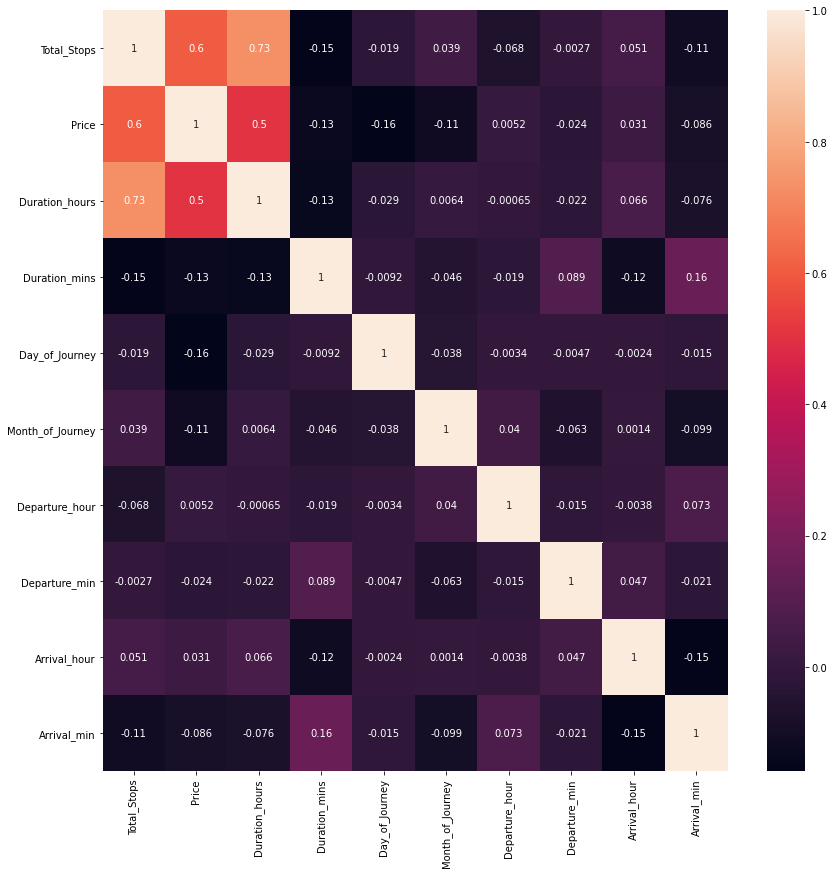

In [54]:
# Finding Correlation
plt.figure(figsize=(14,14))
sns.heatmap(train_data.corr(),annot=True)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [57]:
print("The size of training input is", X_train.shape)
print("The size of training output is", Y_train.shape)

print("The size of testing input is", X_test.shape)
print("The size of testing output is", Y_test.shape)

The size of training input is (7323, 28)
The size of training output is (7323,)
The size of testing input is (3139, 28)
The size of testing output is (3139,)


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
y_pred = reg_rf.predict(X_test)


In [61]:
reg_rf.score(X_train, Y_train)

0.9552463764600635

In [62]:
reg_rf.score(X_test, Y_test)

0.8149013610150591

In [63]:
from sklearn import metrics

In [64]:
print(" Results for Random Forest Regressor Model:")
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RootMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("R-squared: ", r2_score(Y_test, y_pred))

 Results for Random Forest Regressor Model:
MAE: 1194.9839912278705
MSE: 3844237.7228316655
RootMSE: 1960.6727730122805
R-squared:  0.8149013610150591


In [65]:
dec = DecisionTreeRegressor()

In [66]:
dec.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
y_pred = dec.predict(X_test)

In [68]:
dec.score(X_train, Y_train)

0.9741256432975037

In [69]:
dec.score(X_test, Y_test)

0.7223979368798257

In [70]:
print(" Results for Decison Tree Model:")
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RootMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("R-squared: ", r2_score(Y_test, y_pred))

 Results for Decison Tree Model:
MAE: 1397.4929648508016
MSE: 5765403.402395047
RootMSE: 2401.125444951814
R-squared:  0.7223979368798257


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
depth = list(range(3,30))

In [73]:
# RandomForestRegressor
tuned_params = {'n_estimators':[100,200,300,400,500],'min_samples_split':[2,5,10],'min_samples_leaf': [1, 2, 4]}
rf_regressor = RandomizedSearchCV(RandomForestRegressor(),tuned_params,n_iter=20,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
rf_regressor.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [74]:
prediction = rf_regressor.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print("R-squared:", r2_score(Y_test, prediction))

MAE: 1159.7678510074443
MSE: 3567486.8810174563
RMSE: 1888.7792038820885
R-squared: 0.8282268127303638


In [76]:
#Decision Tree
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [77]:
prediction = tree.predict(X_test)

In [78]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print("R-squared:", r2_score(Y_test, prediction))

MAE: 1352.9684217496294
MSE: 4391904.502299899
RMSE: 2095.687119371568
R-squared: 0.7885314060836129


In [79]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [80]:
model = open('flight_rf.pkl','rb')
flight = pickle.load(model)

In [81]:
y_prediction = flight.predict(X_test)

In [82]:
r2_score(Y_test, y_prediction)

0.8149013610150591